In [4]:
import math

import matplotlib.pyplot as plt

t_max = 150e-3   # second
dt = 1e-3        # second
tau = 20e-3      # second
el = -60e-3      # milivolt
vr = -70e-3      # milivolt
vth = -50e-3     # milivolt
r = 100e6        # ohm
i_mean = 25e-11  # ampere

print(t_max, dt, tau, el, vr, vth, r, i_mean)

0.15 0.001 0.02 -0.06 -0.07 -0.05 100000000.0 2.5e-10


# Math Operations
## Simulating an input current
$$ I(t) = Imean(1 + sin(2*pi/0.01 t)) $$


In [5]:
for step in range(10):
    t = step * dt
    i = i_mean * (1 + math.sin((2 * math.pi) / 0.01 * t))
    print(f'{t:.3f} {i:.3e}')

0.000 2.500e-10
0.001 3.969e-10
0.002 4.878e-10
0.003 4.878e-10
0.004 3.969e-10
0.005 2.500e-10
0.006 1.031e-10
0.007 1.224e-11
0.008 1.224e-11
0.009 1.031e-10


In [6]:
a = 3.969463130731183e-10
print(f'{a:.4e}')

3.9695e-10


In [26]:
import numpy as np
start_end = 10
v = el
for step in range(start_end):
    t = step * dt
    i = i_mean * (1 + np.sin((2 * np.pi) / 0.01 * t))
    v = v + dt/tau * (el -v + r*i)
    print(f'{t:.3f} {v:.4e}')

0.000 -5.8750e-02
0.001 -5.7562e-02
0.002 -5.6434e-02
0.003 -5.5363e-02
0.004 -5.4345e-02
0.005 -5.3377e-02
0.006 -5.2458e-02
0.007 -5.1586e-02
0.008 -5.0756e-02
0.009 -4.9968e-02


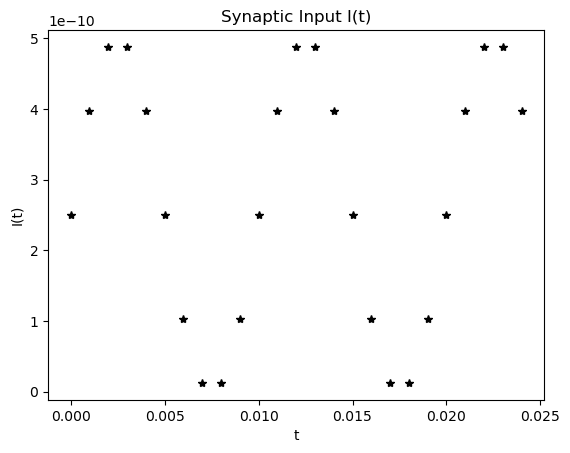

In [22]:
# Plotting synaptic
import matplotlib.pyplot as plt
step_end = 25

plt.figure()
plt.title('Synaptic Input I(t)')
plt.xlabel('t')
plt.ylabel('I(t)')
for step in range(step_end):
    t = step * dt
    i = i_mean * (1 + np.sin((2 * math.pi) / 0.01 * t))
    plt.plot(t, i, 'k*')
plt.show()

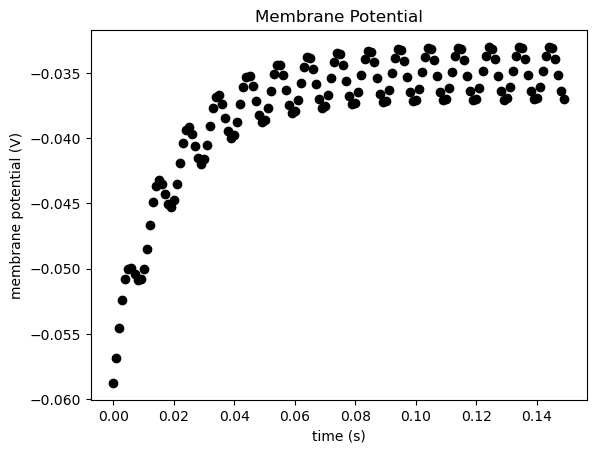

In [33]:
# Plotting membrane potential
step_end = int(t_max / dt) # Expect 150
# Initialize v0
v = el
# Figure part
plt.figure()
plt.title('Membrane Potential')
plt.xlabel('time (s)')
plt.ylabel('membrane potential (V)')

for step in range(step_end):
    t = step * dt
    i = i_mean * (1 + np.sin((2 * math.pi) / 0.01 * t))
    v = v + dt/tau * (el -v + r*i) # Membrane potential through each interval
    plt.plot(t, v, 'ko')
plt.show()

## Adding randomness

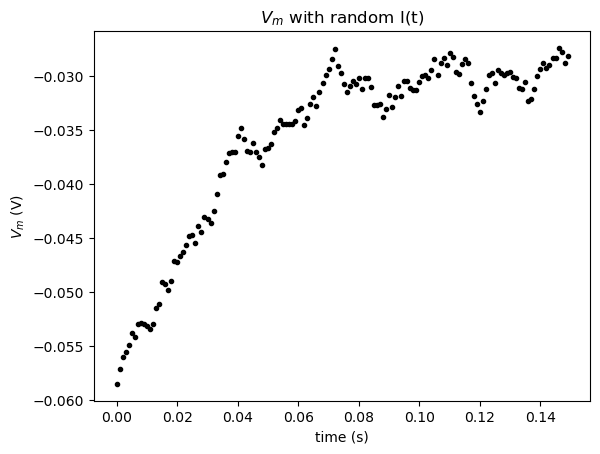

In [34]:
np.random.seed(2000) # Set seed for same results of randomness
step_end = int(t_max / dt)
v = el
plt.figure()
plt.title('$V_m$ with random I(t)')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

for step in range(step_end):
    t = step * dt
    random_number = np.random.uniform(-1,1)
    # Calculate new current with the random number initialized. For reference I will put the formular up.
    i = i_mean * (1 + 0.1 * np.sqrt(t_max / dt) * random_number)

    v = v + dt/tau * (el - v + r*i)
    plt.plot(t, v, 'k.')
plt.show()

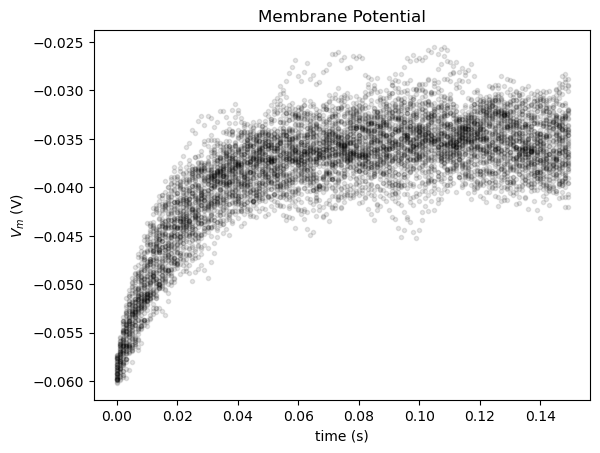

In [46]:
np.random.seed(2020)
step_end = int(t_max / dt)
n = 50
v_n = [el] * n
plt.figure()
plt.title('Membrane Potential')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')
for step in range(step_end):
    t = step * dt
    for j in range(0, n):
        i = i_mean * (1 + 0.1 * (t_max/dt)**(0.5) * (2* np.random.random() - 1))
        v_n[j] = v_n[j] + (dt / tau) * (el - v_n[j] + r*i)
    plt.plot([t]*n, v_n, 'k.', alpha=0.1)
plt.show()

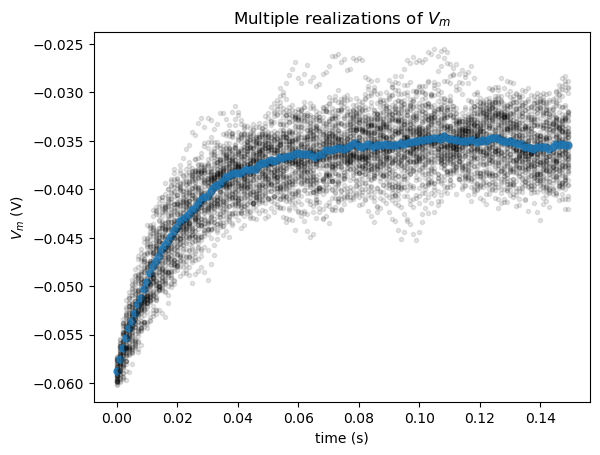

In [50]:
# Plotting sample mean
np.random.seed(2020)

step_end = int(t_max / dt)
n = 50
v_n = [el] * n

plt.figure()
plt.title('Multiple realizations of $V_m$')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

for step in range(step_end):
    t = step * dt
    for j in range(0, n):
        i = i_mean * (1 + 0.1 * (t_max/dt)**(0.5) * (2* np.random.random() - 1))
        v_n[j] = v_n[j] + (dt / tau) * (el - v_n[j] + r*i)
    v_mean = np.mean(v_n)
    plt.plot([t]*n, v_n, 'k.', alpha=0.1)
    plt.plot(t, v_mean, 'C0.', alpha=0.8, markersize=10)
plt.show()

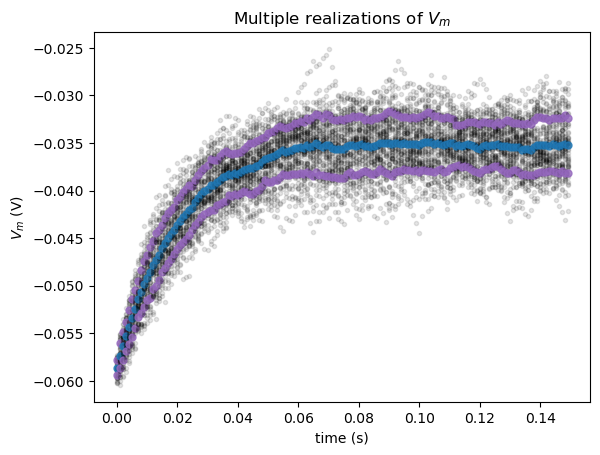

In [54]:
step_end = int(t_max / dt)
n = 50
v_n = [el] * n
plt.figure()
plt.title('Multiple realizations of $V_m$')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')
for step in range(step_end):
    t = step * dt
    for j in range(0, n):
        i = i_mean * (1 + 0.1 * (t_max/dt)**(0.5) * (2* np.random.random() - 1))
        v_n[j] = v_n[j] + (dt / tau) * (el - v_n[j] + r*i)
    v_mean = np.mean(v_n)
    v_var_n = np.var(v_n)
    v_std = np.std(v_n)
    plt.plot([t]*n, v_n, 'k.', alpha=0.1)
    plt.plot(t, v_mean, 'C0.', alpha=0.8, markersize=10)
    plt.plot(t, v_mean + v_std, 'C4.', alpha=0.8, markersize=10)
    plt.plot(t, v_mean - v_std, 'C4.', alpha=0.8, markersize=10)
plt.show()

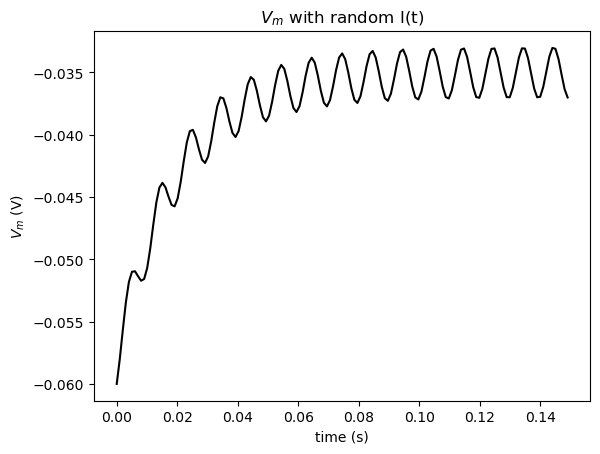

In [60]:
np.random.seed(2020)
step_end = int(t_max / dt) - 1
v = el * np.ones(step_end)
t_range = np.linspace(0, t_max, num=step_end, endpoint=False)
i = i_mean * (1 + np.sin((2 * math.pi) / 0.01 * t_range))
for step in range(1, step_end):
    v[step] = v[step - 1] + (dt / tau) * (el - v[step - 1] + r * i[step])
plt.figure()
plt.title('$V_m$ with random I(t)')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

plt.plot(t_range, v, 'k')
plt.show()

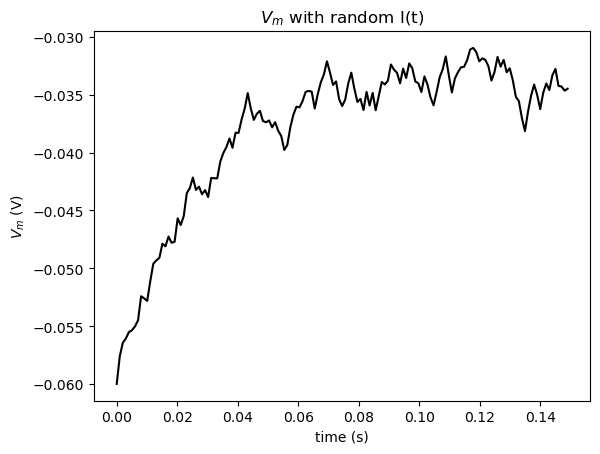

In [59]:
# Using enumerate and indexing
np.random.seed(2020)
step_end = int(t_max / dt) - 1
t_range = np.linspace(0, t_max, num=step_end, endpoint=False)
i = i_mean * (1 + 0.1 * (t_max/dt) ** 0.5 * (2 * np.random.random(step_end) - 1))
for step, i_step in enumerate(i):
    if step == 0:
        continue
    v[step] = v[step - 1] + (dt / tau) * (el - v[step - 1] + r * i_step)
plt.figure()
plt.title('$V_m$ with random I(t)')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

plt.plot(t_range, v, 'k')
plt.show()

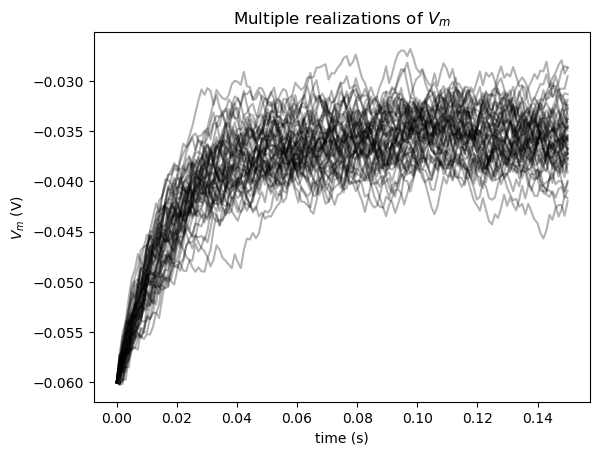

In [66]:
np.random.seed(2020)
step_end = int(t_max / dt)
n = 50
t_range = np.linspace(0, t_max, num=step_end)
v_n = el * np.ones([n, step_end])
i = i_mean * (1 + 0.1 * (t_max/dt) ** 0.5 * (2 * np.random.random([n,step_end]) - 1))
for step in range(1, step_end):
    v_n[:, step] = v_n[:, step - 1] + (dt / tau) * (el - v_n[:, step - 1] + r * i[:, step])

plt.figure()
plt.title('Multiple realizations of $V_m$')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')
plt.plot(t_range, v_n.T, 'k', alpha=0.3)
plt.show()